In [2]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from pprint import pprint

In [3]:
# necessity items

necessities = pd.read_csv('Resources/necessityitems_consumption_19_20.csv')
necessities

,Consumption Category,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
0,Gasoline and other motor fuel,416232,413890,411127,419375,411998,413314,410698,417331,411279,...,403003,414196,412515,348239,258098,312138,352503,363811,369140,374007
1,Lubricants and fluids,7617,7591,7545,7660,7535,7555,7506,7612,7489,...,7358,7555,7541,6383,4743,5721,6446,6656,6742,6831
2,Fuel oil,24220,23751,24371,23015,22774,23604,23258,23221,22515,...,21250,19725,21692,23366,27167,30496,27746,26913,26182,28497
3,Other fuels,1614,1628,1677,1610,1589,1638,1621,1618,1587,...,1497,1428,1438,1347,1361,1418,1388,1398,1425,1479
4,Prescription drugs,376230,383557,386897,381678,386486,390877,392962,396058,397687,...,393525,397892,404197,429613,392311,396323,404648,408873,412429,417457
5,Nonprescription drugs,76356,76578,76869,76924,77264,77546,77802,76594,77062,...,77449,78626,79126,85388,76229,79927,82875,85731,84330,84740
6,Other medical products,6348,6393,6504,6409,6423,6428,6545,6531,6584,...,6523,6612,6614,6215,5233,5800,6284,6791,6945,7151
7,Household cleaning products,39808,39000,39233,39404,39403,39517,39833,39976,39676,...,39571,39791,40017,46227,40557,42437,42594,41637,41494,41810
8,Household paper products,38486,38043,37969,38330,38133,38033,38614,38772,38374,...,37652,38042,37937,44706,37601,39052,39452,37998,37965,39656
9,Household linens,50275,52134,52048,53455,53907,55545,55025,54317,53697,...,56232,53555,52812,50236,42161,51225,54864,56319,56326,56894


In [4]:
necessities19 = necessities.loc[:, ['Consumption Category ', '2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06', '2019M07', '2019M08', '2019M09']]
necessities19.dtypes

necessities20 = necessities.loc[:, ['Consumption Category ', '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06', '2020M07', '2020M08', '2020M09']]
necessities20.dtypes

necessities.describe()

,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
count,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,80212.800000,80605.600000,80797.533333,81083.80000,81097.000000,81732.133333,81685.866667,82245.733333,81850.400000,82144.533333,...,81104.266667,82079.133333,82415.133333,81300.000000,69757.066667,76030.333333,80133.200000,81526.000000,81930.066667,83190.466667
std,130904.951081,131670.947307,131692.993362,132315.60156,131728.341512,132625.349323,132508.001569,134195.807401,133446.073575,133895.057828,...,131306.974802,134059.772951,134783.083585,128764.443953,109395.287332,116871.688144,124436.517884,127008.446028,128534.417774,130051.608505
min,1614.000000,1628.000000,1677.000000,1610.00000,1589.000000,1638.000000,1621.000000,1618.000000,1587.000000,1565.000000,...,1497.000000,1428.000000,1438.000000,1347.000000,1361.000000,1418.000000,1388.000000,1398.000000,1425.000000,1479.000000
25%,8633.000000,8636.000000,8646.500000,8734.50000,8711.000000,8762.000000,8734.500000,8814.500000,8743.500000,8776.500000,...,8620.500000,8806.000000,8752.000000,8303.000000,7420.500000,8306.000000,8835.500000,8983.500000,9032.000000,9200.000000
50%,38486.000000,38043.000000,37969.000000,38330.00000,38133.000000,38033.000000,38614.000000,38772.000000,38374.000000,38328.000000,...,37652.000000,38042.000000,37937.000000,44706.000000,37601.000000,39052.000000,39452.000000,37998.000000,37965.000000,39656.000000
75%,65790.500000,65948.500000,66434.500000,66564.50000,67312.000000,67532.000000,67393.000000,66651.500000,66960.500000,67494.500000,...,67668.000000,68057.000000,67261.500000,69307.000000,60503.500000,66115.000000,69521.500000,71348.500000,71110.000000,72470.000000
max,416232.000000,413890.000000,411127.000000,419375.00000,411998.000000,413314.000000,410698.000000,417331.000000,411279.000000,417060.000000,...,403003.000000,414196.000000,412515.000000,429613.000000,392311.000000,396323.000000,404648.000000,408873.000000,412429.000000,417457.000000


In [5]:
totalNecessities19 = necessities19.sum(axis=1)
necessities19['Total'] = totalNecessities19
necessities19

,Consumption Category,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,Total
0,Gasoline and other motor fuel,416232,413890,411127,419375,411998,413314,410698,417331,411279,3725244
1,Lubricants and fluids,7617,7591,7545,7660,7535,7555,7506,7612,7489,68110
2,Fuel oil,24220,23751,24371,23015,22774,23604,23258,23221,22515,210729
3,Other fuels,1614,1628,1677,1610,1589,1638,1621,1618,1587,14582
4,Prescription drugs,376230,383557,386897,381678,386486,390877,392962,396058,397687,3492432
5,Nonprescription drugs,76356,76578,76869,76924,77264,77546,77802,76594,77062,692995
6,Other medical products,6348,6393,6504,6409,6423,6428,6545,6531,6584,58165
7,Household cleaning products,39808,39000,39233,39404,39403,39517,39833,39976,39676,355850
8,Household paper products,38486,38043,37969,38330,38133,38033,38614,38772,38374,344754
9,Household linens,50275,52134,52048,53455,53907,55545,55025,54317,53697,480403


In [6]:
totalNecessities20 = necessities20.sum(axis=1)
necessities20['Total'] = totalNecessities20
necessities20

,Consumption Category,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09,Total
0,Gasoline and other motor fuel,414196,412515,348239,258098,312138,352503,363811,369140,374007,3204647
1,Lubricants and fluids,7555,7541,6383,4743,5721,6446,6656,6742,6831,58618
2,Fuel oil,19725,21692,23366,27167,30496,27746,26913,26182,28497,231784
3,Other fuels,1428,1438,1347,1361,1418,1388,1398,1425,1479,12682
4,Prescription drugs,397892,404197,429613,392311,396323,404648,408873,412429,417457,3663743
5,Nonprescription drugs,78626,79126,85388,76229,79927,82875,85731,84330,84740,736972
6,Other medical products,6612,6614,6215,5233,5800,6284,6791,6945,7151,57645
7,Household cleaning products,39791,40017,46227,40557,42437,42594,41637,41494,41810,376564
8,Household paper products,38042,37937,44706,37601,39052,39452,37998,37965,39656,352409
9,Household linens,53555,52812,50236,42161,51225,54864,56319,56326,56894,474392


In [7]:
necessityYearTotals = pd.DataFrame({
    'Category': necessities19['Consumption Category '],
    '2019': totalNecessities19,
    '2020': totalNecessities20
    
})
necessityYearTotals = necessityYearTotals['Category'].str.lstrip()

In [8]:
q1_data = pd.DataFrame({
    'Category': necessities['Consumption Category '],
    'Jan 2019': necessities['2019M01'],
    'Jan 2020': necessities['2020M01'],
    'Feb 2019': necessities['2019M02'],
    'Feb 2020': necessities['2020M02'],
    'Mar 2019': necessities['2019M03'],
    'Mar 2020': necessities['2020M03']
})
q1_data

,Category,Jan 2019,Jan 2020,Feb 2019,Feb 2020,Mar 2019,Mar 2020
0,Gasoline and other motor fuel,416232,414196,413890,412515,411127,348239
1,Lubricants and fluids,7617,7555,7591,7541,7545,6383
2,Fuel oil,24220,19725,23751,21692,24371,23366
3,Other fuels,1614,1428,1628,1438,1677,1347
4,Prescription drugs,376230,397892,383557,404197,386897,429613
5,Nonprescription drugs,76356,78626,76578,79126,76869,85388
6,Other medical products,6348,6612,6393,6614,6504,6215
7,Household cleaning products,39808,39791,39000,40017,39233,46227
8,Household paper products,38486,38042,38043,37937,37969,44706
9,Household linens,50275,53555,52134,52812,52048,50236


In [9]:
q2_data = pd.DataFrame({
    'Category': necessities['Consumption Category '],
    'Apr 2019': necessities['2019M04'],
    'Apr 2020': necessities['2020M04'],
    'May 2019': necessities['2019M05'],
    'May 2020': necessities['2020M05'],
    'Jun 2019': necessities['2019M06'],
    'Jun 2020': necessities['2020M06']
})
q2_data

,Category,Apr 2019,Apr 2020,May 2019,May 2020,Jun 2019,Jun 2020
0,Gasoline and other motor fuel,419375,258098,411998,312138,413314,352503
1,Lubricants and fluids,7660,4743,7535,5721,7555,6446
2,Fuel oil,23015,27167,22774,30496,23604,27746
3,Other fuels,1610,1361,1589,1418,1638,1388
4,Prescription drugs,381678,392311,386486,396323,390877,404648
5,Nonprescription drugs,76924,76229,77264,79927,77546,82875
6,Other medical products,6409,5233,6423,5800,6428,6284
7,Household cleaning products,39404,40557,39403,42437,39517,42594
8,Household paper products,38330,37601,38133,39052,38033,39452
9,Household linens,53455,42161,53907,51225,55545,54864


In [10]:
q3_data = pd.DataFrame({
    'Category': necessities['Consumption Category '],
    'Jul 2019': necessities['2019M07'],
    'Jul 2020': necessities['2020M07'],
    'Aug 2019': necessities['2019M08'],
    'Aug 2020': necessities['2020M08'],
    'Sep 2019': necessities['2019M09'],
    'Sep 2020': necessities['2020M09']
})
q3_data

,Category,Jul 2019,Jul 2020,Aug 2019,Aug 2020,Sep 2019,Sep 2020
0,Gasoline and other motor fuel,410698,363811,417331,369140,411279,374007
1,Lubricants and fluids,7506,6656,7612,6742,7489,6831
2,Fuel oil,23258,26913,23221,26182,22515,28497
3,Other fuels,1621,1398,1618,1425,1587,1479
4,Prescription drugs,392962,408873,396058,412429,397687,417457
5,Nonprescription drugs,77802,85731,76594,84330,77062,84740
6,Other medical products,6545,6791,6531,6945,6584,7151
7,Household cleaning products,39833,41637,39976,41494,39676,41810
8,Household paper products,38614,37998,38772,37965,38374,39656
9,Household linens,55025,56319,54317,56326,53697,56894


In [11]:
graph_necessities_df = necessities.set_index("Consumption Category ")
graph_necessities_df

#.str.lstrip()

months = graph_necessities_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]

graph19_df = graph_necessities_df[['2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09']]
months = graph19_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]


graph20_df = graph_necessities_df[['2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09']]
months = graph20_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]

In [12]:
graph_necessities_df.columns

Index(['2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09', '2019M10', '2019M11', '2019M12',
       '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09'],
      dtype='object')

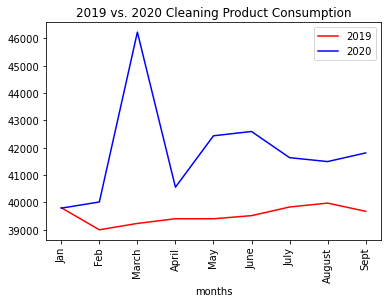

In [13]:
# 2019 vs. 2020 Cleaning Product Consumption
cleaningproduct19 = plt.plot(months, graph19_df.loc['Household cleaning products',['2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09']], color="red", label="2019")

cleaningproduct20 = plt.plot(months, graph20_df.loc['Household cleaning products',['2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09']], color="blue", label="2020")

plt.legend([2019, 2020], loc="best")
plt.title("2019 vs. 2020 Cleaning Product Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

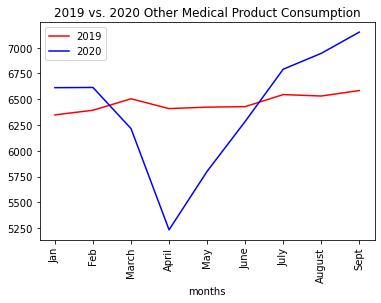

In [14]:
# 2019 vs. 2020 Other Medical Product Consumption
othermedicalproduct19 = plt.plot(months, graph19_df.loc['Other medical products',['2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09']], color="red", label="2019")

othermedicalproduct20 = plt.plot(months, graph20_df.loc['Other medical products',['2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09']], color="blue", label="2020")

plt.legend([2019, 2020], loc="best")
plt.title("2019 vs. 2020 Other Medical Product Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

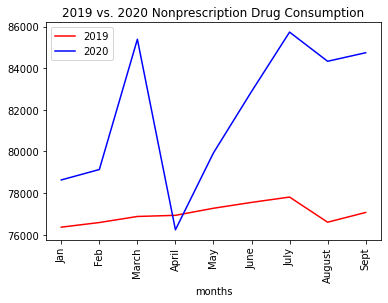

In [15]:
# 2019 vs. 2020 Nonprescription Drug Consumption
nonpresceiptiondrugs19 = plt.plot(months, graph19_df.loc['Nonprescription drugs',['2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09']], color="red", label="2019")

nonprescriptiondrugs20 = plt.plot(months, graph20_df.loc['Nonprescription drugs',['2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09']], color="blue", label="2020")

plt.legend([2019, 2020], loc="best")
plt.title("2019 vs. 2020 Nonprescription Drug Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

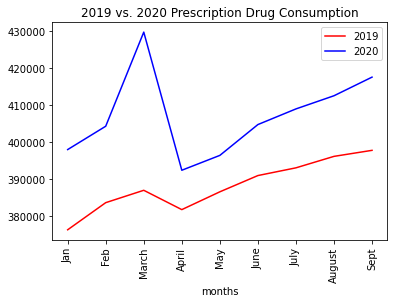

In [12]:
# 2019 vs. 2020 Prescription Drug Consumption
presceiptiondrugs19 = plt.plot(months, graph19_df.loc['Prescription drugs',['2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09']], color="red", label="2019")

prescriptiondrugs20 = plt.plot(months, graph20_df.loc['Prescription drugs',['2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09']], color="blue", label="2020")

plt.legend([2019, 2020], loc="best")
plt.title("2019 vs. 2020 Prescription Drug Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()